In [1]:
import re 
from konlpy.tag import Mecab
import tensorflow as tf 
tf.random.set_seed(0)

mecab = Mecab(dicpath="C:\mecab\mecab-ko-dic")
with open('wiki_space_tokenizer.txt', mode='r', encoding='utf-8') as f: 
    wiki_contents = f.read()
wiki_contents = wiki_contents.split("\n")

In [2]:
len(wiki_contents)

1806748

In [3]:
wiki_contents = wiki_contents[:1000]

In [4]:
text = list() 
maxlen = 8
tmp_content = list()
for content in wiki_contents: 
    content = content.strip()
    content = re.sub(r'\([^)]*\)', '', content)
    content = content.lower()
    if not content: continue 
    if content[-1] == '.':
        if len(tmp_content) > 0: 
            tmp_content = tmp_content + [('\n', 'ENTER')] + mecab.pos(content)
        else: tmp_content = mecab.pos(content) 
    else:
        if len(tmp_content) > maxlen: 
            text.append(tmp_content+[('E', 'END')]) 
        tmp_content = list()    

In [5]:
len(text), text[:2]

(110,
 [[('제임스', 'NNP'),
   ('얼', 'NNP'),
   ('"', 'SY'),
   ('지미', 'NNG'),
   ('"', 'SY'),
   ('카터', 'NNP'),
   ('주니어', 'NNP'),
   ('는', 'JX'),
   ('민주당', 'NNP'),
   ('출신', 'NNG'),
   ('미국', 'NNP'),
   ('39', 'SN'),
   ('번', 'NNBC'),
   ('째', 'XSN'),
   ('대통령', 'NNG'),
   ('이', 'VCP'),
   ('다', 'EF'),
   ('.', 'SF'),
   ('\n', 'ENTER'),
   ('지미', 'IC'),
   ('카터', 'NNP'),
   ('는', 'JX'),
   ('조지아', 'NNP'),
   ('주', 'NNP'),
   ('섬터', 'NNP'),
   ('카운티', 'NNP'),
   ('플', 'NNG'),
   ('레인스', 'NNP'),
   ('마을', 'NNG'),
   ('에서', 'JKB'),
   ('태어났', 'VV+EP'),
   ('다', 'EF'),
   ('.', 'SF'),
   ('조지', 'VV'),
   ('아', 'EC'),
   ('공과', 'NNG'),
   ('대학교', 'NNG'),
   ('를', 'JKO'),
   ('졸업', 'NNG'),
   ('하', 'XSV'),
   ('였', 'EP'),
   ('다', 'EF'),
   ('.', 'SF'),
   ('그', 'MM'),
   ('후', 'NNG'),
   ('해군', 'NNG'),
   ('에', 'JKB'),
   ('들어가', 'VV+EC'),
   ('전함', 'NNG'),
   ('·', 'SC'),
   ('원자력', 'NNG'),
   ('·', 'SC'),
   ('잠수함', 'NNG'),
   ('의', 'JKG'),
   ('승무원', 'NNG'),
   ('으로', 'JKB'),
   ('일', '

In [6]:
total_text = list() 
for elem in text: total_text += elem
len(total_text)

69130

In [7]:
words = sorted(list(set(total_text)))
word_size = len(words)
word_indices = dict((c, i) for i, c in enumerate(words))
indices_word = dict((i, c) for i, c in enumerate(words))
print('total words: ', word_size)

total words:  8325


In [8]:
word_indices

{('\n', 'ENTER'): 0,
 ('"', 'SY'): 1,
 ('""', 'SY'): 2,
 ('"\'', 'SY'): 3,
 ('",', 'SY'): 4,
 ('".', 'SY'): 5,
 ('"/', 'SY'): 6,
 ('"”', 'SY'): 7,
 ('%', 'SY'): 8,
 ('%,', 'SY'): 9,
 ("'", 'SY'): 10,
 ("''", 'SY'): 11,
 (')', 'SSC'): 12,
 ('*', 'SY'): 13,
 ('+', 'SY'): 14,
 (',', 'SC'): 15,
 ('-', 'SY'): 16,
 ('-"', 'SY'): 17,
 ('.', 'SF'): 18,
 ('.', 'SY'): 19,
 ('..', 'SY'): 20,
 ('/', 'SC'): 21,
 ('0', 'SN'): 22,
 ('000', 'SN'): 23,
 ('04', 'SN'): 24,
 ('061', 'SN'): 25,
 ('1', 'SN'): 26,
 ('10', 'SN'): 27,
 ('100', 'SN'): 28,
 ('1000', 'SN'): 29,
 ('11', 'SN'): 30,
 ('117', 'SN'): 31,
 ('12', 'SN'): 32,
 ('13', 'SN'): 33,
 ('132', 'SN'): 34,
 ('14', 'SN'): 35,
 ('14159', 'SN'): 36,
 ('15', 'SN'): 37,
 ('150', 'SN'): 38,
 ('1500', 'SN'): 39,
 ('151', 'SN'): 40,
 ('152', 'SN'): 41,
 ('158', 'SN'): 42,
 ('16', 'SN'): 43,
 ('160', 'SN'): 44,
 ('1623', 'SN'): 45,
 ('17', 'SN'): 46,
 ('1733', 'SN'): 47,
 ('1784', 'SN'): 48,
 ('1794', 'SN'): 49,
 ('18', 'SN'): 50,
 ('180', 'SN'): 51,
 ('1

In [9]:
sentences = []
next_words = []
for content in text: 
    for i in range(0, len(content) - maxlen, 1):
        sentences.append([word_indices[elem] for elem in content[i: i + maxlen]])
        next_words.append(word_indices[content[i + maxlen]])
print("sequences length: ", len(sentences))

sequences length:  68250


In [10]:
from tensorflow.keras.utils import to_categorical 
import numpy as np
data_X = np.array(sentences) 
data_Y = np.array(next_words) 
data_Y = to_categorical(data_Y)
y_size = data_Y.shape[1]

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim=word_size, 
                   output_dim=200, 
                   input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(y_size, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
import time 
start_time = time.time()

history = model.fit(data_X, data_Y,
          batch_size=256,
          epochs=150, 
          verbose=2)

end_time = time.time()

Train on 68250 samples
Epoch 1/150
68250/68250 - 12s - loss: 7.1869 - accuracy: 0.0332
Epoch 2/150
68250/68250 - 8s - loss: 6.5115 - accuracy: 0.0506
Epoch 3/150
68250/68250 - 8s - loss: 6.2840 - accuracy: 0.0733
Epoch 4/150
68250/68250 - 8s - loss: 6.0673 - accuracy: 0.0895
Epoch 5/150
68250/68250 - 9s - loss: 5.8438 - accuracy: 0.1238
Epoch 6/150
68250/68250 - 9s - loss: 5.6518 - accuracy: 0.1528
Epoch 7/150
68250/68250 - 8s - loss: 5.4942 - accuracy: 0.1736
Epoch 8/150
68250/68250 - 9s - loss: 5.3505 - accuracy: 0.1907
Epoch 9/150
68250/68250 - 9s - loss: 5.2136 - accuracy: 0.2043
Epoch 10/150
68250/68250 - 9s - loss: 5.0827 - accuracy: 0.2156
Epoch 11/150
68250/68250 - 9s - loss: 4.9561 - accuracy: 0.2285
Epoch 12/150
68250/68250 - 9s - loss: 4.8349 - accuracy: 0.2408
Epoch 13/150
68250/68250 - 9s - loss: 4.7195 - accuracy: 0.2535
Epoch 14/150
68250/68250 - 9s - loss: 4.6076 - accuracy: 0.2657
Epoch 15/150
68250/68250 - 10s - loss: 4.5009 - accuracy: 0.2774
Epoch 16/150
68250/68250

Epoch 128/150
68250/68250 - 9s - loss: 0.5342 - accuracy: 0.9014
Epoch 129/150
68250/68250 - 9s - loss: 0.5284 - accuracy: 0.9018
Epoch 130/150
68250/68250 - 9s - loss: 0.5179 - accuracy: 0.9047
Epoch 131/150
68250/68250 - 9s - loss: 0.5050 - accuracy: 0.9073
Epoch 132/150
68250/68250 - 10s - loss: 0.4971 - accuracy: 0.9092
Epoch 133/150
68250/68250 - 10s - loss: 0.4889 - accuracy: 0.9108
Epoch 134/150
68250/68250 - 10s - loss: 0.4778 - accuracy: 0.9133
Epoch 135/150
68250/68250 - 9s - loss: 0.4699 - accuracy: 0.9154
Epoch 136/150
68250/68250 - 9s - loss: 0.4611 - accuracy: 0.9164
Epoch 137/150
68250/68250 - 9s - loss: 0.4536 - accuracy: 0.9183
Epoch 138/150
68250/68250 - 9s - loss: 0.4471 - accuracy: 0.9195
Epoch 139/150
68250/68250 - 9s - loss: 0.4394 - accuracy: 0.9205
Epoch 140/150
68250/68250 - 9s - loss: 0.4354 - accuracy: 0.9215
Epoch 141/150
68250/68250 - 9s - loss: 0.4384 - accuracy: 0.9201
Epoch 142/150
68250/68250 - 9s - loss: 0.4288 - accuracy: 0.9218
Epoch 143/150
68250/68

In [14]:
"Time: {}".format(end_time-start_time)

'Time: 1376.9022271633148'

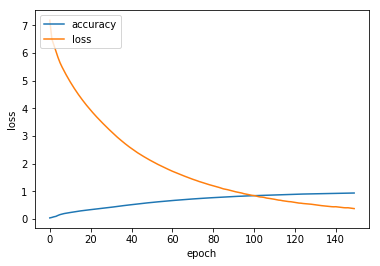

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [16]:
import sys
from nltk.translate import bleu_score

def text_generation(model):
    text_idx = 0
    current_text = text[text_idx]
    sentence = current_text[:maxlen]
    generated = ' '.join([elem[0] for elem in sentence])
    print('----- Generating with seed: "' + generated + '"')
    sys.stdout.write(generated)

    for i in range(200): 
        x_pred = list()
        for word in sentence: 
            x_pred.append([word_indices[word]])

        x_pred = np.asarray(x_pred)
        preds = model.predict(x_pred.T)[0] 
        next_idx = np.argmax(preds)
        next_word = indices_word[next_idx]
        sentence = sentence[1:] + [next_word]
        sys.stdout.write(' ' + next_word[0])
        sys.stdout.flush()
        if next_word == ('E', 'END'): break 
    print()

def text_generation_res(model):
    text_idx = 0
    current_text = text[text_idx]
    generated = list()
    sentence = current_text[:maxlen]
    generated += sentence
    
    for i in range(min(200, len(current_text))): 
        x_pred = list()
        for word in sentence: 
            x_pred.append([word_indices[word]])

        x_pred = np.asarray(x_pred)
        preds = model.predict(x_pred.T)[0] 
        next_idx = np.argmax(preds)
        next_word = indices_word[next_idx]
        sentence = sentence[1:] + [next_word]
        generated += [next_word]
        if next_word == ('E', 'END'): break
        
    return generated, text_idx

def get_BLEU_score(model): 
    predict_text, text_idx = text_generation_res(model) 
    pred_len = len(predict_text) 
    original_text = text[text_idx] 
    original_text = original_text[:pred_len]
    BLEUscore = bleu_score.sentence_bleu([original_text], predict_text)
    return BLEUscore

In [17]:
text_generation(model)

----- Generating with seed: "제임스 얼 " 지미 " 카터 주니어 는"
제임스 얼 " 지미 " 카터 주니어 는 민주당 출신 미국 39 번 째 대통령 이 다 . 
 지미 카터 는 조지아 주 섬터 카운티 플 레인스 마을 에서 태어났 다 . 조지 아 공과 대학교 를 졸업 하 였 다 . 그 후 해군 에 들어가 전함 · 원자력 · 잠수함 의 승무원 으로 일 하 였 다 . 1953 년 미국 해군 대위 로 예편 하 였 고 이후 땅콩 · 면화 등 을 가꿔 많 은 돈 을 벌 었 다 . 그 의 별명 이 " 땅콩 농부 " 로 알려졌 다 . 
 1962 년 조지아 주 상원 의원 선거 에서 낙선 하 나 그 선거 가 부정 선거 였음을 입증 하 게 되 어 당선 되 고 , 1966 년 조지아 주 지사 선거 에 낙선 하 지만 1970 년 조지아 주 지사 를 역임 했 다 . 대통령 이 되 기 전 조지아 주 상원 의원 을 두 번 연임 했으며 , 1971 년 부터 1975 년 까지 조지 아 지사 로 근무 했 다 . 조지 아 주지사 로 지내 면서 , 미국 에 사 는 흑인 등 용법 을 내세웠 다 . 
 1976 년 대통령 선거 에 노무현 후보 로 출마 하 여 도덕주의 정책 으로 내세워


In [18]:
get_BLEU_score(model)

0.9878485915987741

In [19]:
from rouge import Rouge

evalutaor = Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                           max_n=4,
                           apply_avg='Avg',
                           alpha=0.5, # Default F1_score
                           weight_factor=1.2)

In [20]:
def get_ROUGE_score(model, evaluator): 
    predict_text, text_idx = text_generation_res(model) 
    pred_len = len(predict_text) 
    predict_text = ' '.join([elem[0] for elem in predict_text])
    original_text = text[text_idx] 
    original_text = ' '.join([elem[0] for elem in original_text[:pred_len]]) 
    score = evalutaor.get_scores(original_text, predict_text)
    return score
get_ROUGE_score(model, evalutaor)

{'rouge-2': {'f': 1.0, 'p': 1.0, 'r': 1.0},
 'rouge-1': {'f': 1.0, 'p': 1.0, 'r': 1.0},
 'rouge-4': {'f': 1.0, 'p': 1.0, 'r': 1.0},
 'rouge-3': {'f': 1.0, 'p': 1.0, 'r': 1.0},
 'rouge-l': {'f': 1.0, 'p': 1.0, 'r': 1.0},
 'rouge-w': {'f': 0.7548424918669535,
  'p': 0.8444162680835716,
  'r': 0.6824497582849312}}